## Importa librerías ##

**Para álgebra lineal**

In [1]:
import numpy as np

**Para graficar**

In [2]:
import matplotlib.pyplot as plt

**Para leer archivos WAV (audio) y manipularlos**

In [3]:
import librosa
import librosa.display

**Cargar los archivos**

In [4]:
encender_y, encender_sr = librosa.load("test/encender.wav")
apagar_y, apagar_sr = librosa.load("test/apagar.wav")

**Graficar audio (muy similar a MATLAB)**
    

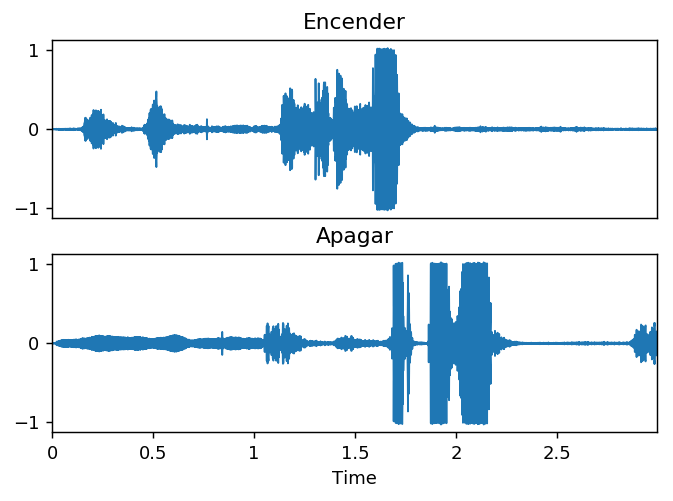

In [5]:

plt.figure(1, dpi=130)
plt.subplot(2,1,1)
plt.title("Encender")
librosa.display.waveplot(encender_y, sr=encender_sr, x_axis='none')
plt.subplot(2,1,2)
plt.title("Apagar")
librosa.display.waveplot(apagar_y, sr=apagar_sr)
plt.show()

**Obtener Mel-frequency cepstral coefficients (Ni idea ._. algo con la FFT)**

¿Qué es un espectrograma?
![Esprectrograma](imagenes/procesamientoAudio/MFCC1.png)
¿Por qué usarlo?
![Formas](imagenes/procesamientoAudio/MFCC2.png)
Obtener espectrograma de Mel
![Melspectrogram](imagenes/procesamientoAudio/MFCC3.png)
Cepstral Analysis WTF?
![Cepstral](imagenes/procesamientoAudio/MFCC4.png)
¿MFCC?
![MFCC](imagenes/procesamientoAudio/MFCC5.png)


**Obtener MFCCs y graficar**

In [16]:
encender_mfcc = librosa.feature.mfcc(y=encender_y, sr=encender_sr)
apagar_mfcc = librosa.feature.mfcc(y=apagar_y, sr=apagar_sr)

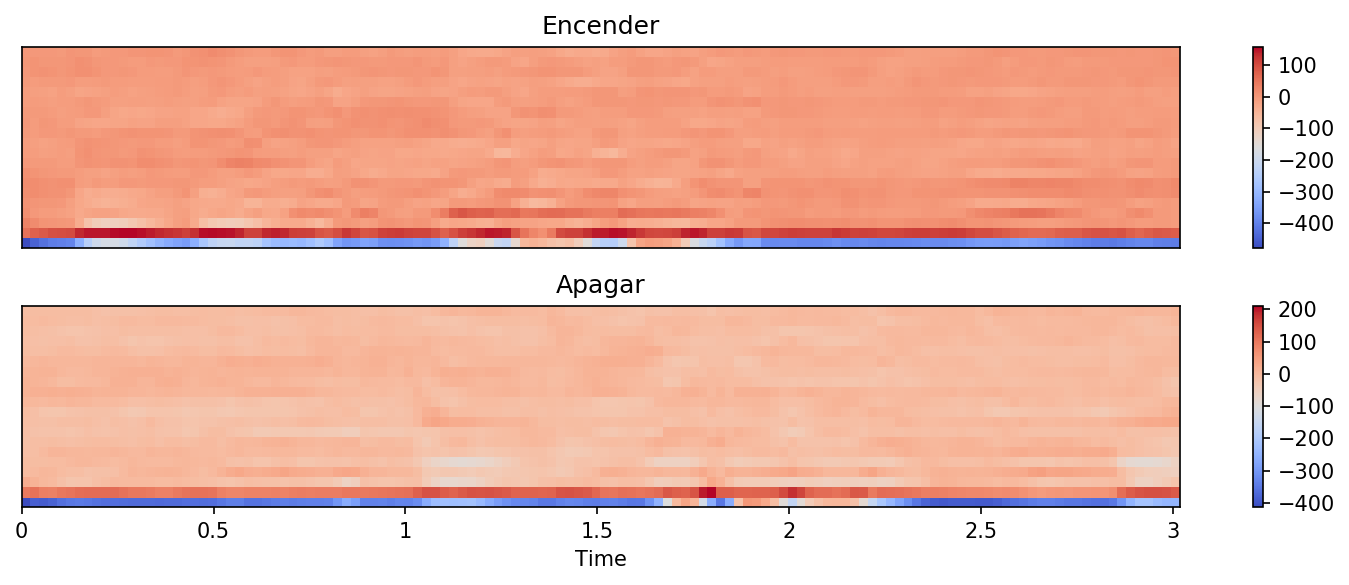

In [19]:
plt.figure(1, dpi=150, figsize=(10,4))
plt.subplot(2,1,1)
plt.title("Encender")
librosa.display.specshow(encender_mfcc, x_axis='off')
plt.colorbar()
plt.tight_layout()
plt.subplot(2,1,2)
plt.title("Apagar")
librosa.display.specshow(apagar_mfcc, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.show()

**Aplanarlos**

In [20]:
print("shape: " + str(encender_mfcc.shape))
print(encender_mfcc)
encender_mfcc_vector = encender_mfcc.reshape(1,20*130)
print("")
print("MFCC vector:")
print(encender_mfcc_vector)

shape: (20, 130)
[[ -4.78026706e+02  -4.44768174e+02  -4.21667570e+02 ...,  -3.99057470e+02
   -4.02650911e+02  -4.05073056e+02]
 [  5.36674040e+01   7.61604406e+01   8.40355541e+01 ...,   8.63390391e+01
    8.46585314e+01   8.11722052e+01]
 [  3.13269587e+01   2.07198530e+01   6.91292233e+00 ...,  -2.90814758e+00
   -2.23191286e+00  -3.89090062e+00]
 ..., 
 [  1.19395594e+00   7.20342061e+00   9.23287433e+00 ...,   2.82695042e+00
    1.65376650e+00   5.30529297e+00]
 [  2.42413648e+00   7.75728371e+00   3.67997938e+00 ...,   2.34232551e+00
    7.40412039e+00   8.74205503e+00]
 [  9.06958656e-01   3.62658744e-01  -7.34493863e-01 ...,   3.86316519e+00
    4.97425221e+00   1.52222122e+00]]

MFCC vector:
[[-478.02670567 -444.76817391 -421.66756956 ...,    3.86316519
     4.97425221    1.52222122]]


**Tomar muestras ejecutando: *toma_muestras.py***

- Aparece la palabra a decir y la forma

**Procesar muestras ejecutando *procesa_muestras.py* **

- Se obtendra los MFCCs de los audios, los convertira en un solo vector
- Creara otro vector con la etiqueta en formato one hot encode
- Cada uno lo añadira en la columna de un dataframe de Pandas:
- Creara dos dataframes distintos uno para entrenar y uno para probar, el data frame de prueba toma el 10% del total de las muestras, todos son tomados al azar
```
  Etiquetas          MFCCs
 [Valore1 Etiqueta][Valores1]
 [Valore2 Etiqueta][Valores2] 
 [Valore3 Etiqueta][Valores3] 
 [Valore4 Etiqueta][Valores4] 
```

**Entrenar Red Neuronal con Tensorflow ejecutando *entrenar_RNN.py* **

- La red comencara a mostrar la salida de la red y la salida esperada.
- La red se entrenara de forma mini-batch (estocastico) 5 muestras por cada cualculo de error y correccion de pesos hasta recorrer todo el set
- Por cada epoca al final mostrara error promedio y la precision promedio
- Por cada epoca ordena el set al azar
- Al final probara la red contra el set de prueba (datos para los que no ha sido entrenada) y mostrara su precision

